# Lab - 8.3.2 Fitting Regression Trees

In [37]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import tree

import graphviz

import matplotlib.pyplot as plt

In [6]:
# loading the dataset
boston_data = load_boston()
boston = pd.DataFrame(boston_data.data,columns = boston_data['feature_names'])
boston['MEDV'] = boston_data['target']
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Again, i would advice you to get familier with the data, since its an inbuilt dataset, we can use boston_data.DESCR to get mode information

In [9]:
boston_data['DESCR'] # I don't think that's good enough to read

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

here, this is better - 
- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per $10,000

- PTRATIO - pupil-teacher ratio by town
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in $1000's

soucrs - [https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html]

Its better that we go through the above list once, so that we know what we are dealing with here.

In [11]:
#splitting the data into train and test 
X_train,X_test,y_train,y_test = train_test_split(boston.drop('MEDV',axis = 1),boston['MEDV'],test_size = 0.5,random_state = 0)

In [12]:
reg = DecisionTreeRegressor()
reg.fit(X_train,y_train)
print('Training score ',reg.score(X_train,y_train))
print('Test scire ',reg.score(X_test,y_test))

Training score  1.0
Test scire  0.6569149609605587


In [17]:
# from the above results, it looks like the tree is overfitting, we will set a max_depth parameter 
reg = DecisionTreeRegressor(max_depth = 5)
reg.fit(X_train,y_train)
print('Training score ',reg.score(X_train,y_train))
print('Test scire ',reg.score(X_test,y_test))

Training score  0.9499393843712041
Test scire  0.691786318131009


In [29]:
scores_dict = {}
for max_depth in np.arange(2,15):
    reg = DecisionTreeRegressor(max_depth = max_depth)
    scores_dict[max_depth] = -np.mean(cross_val_score(reg,boston.drop('MEDV',axis = 1),boston['MEDV'],
                                                      scoring = 'neg_mean_squared_error',cv = 10))

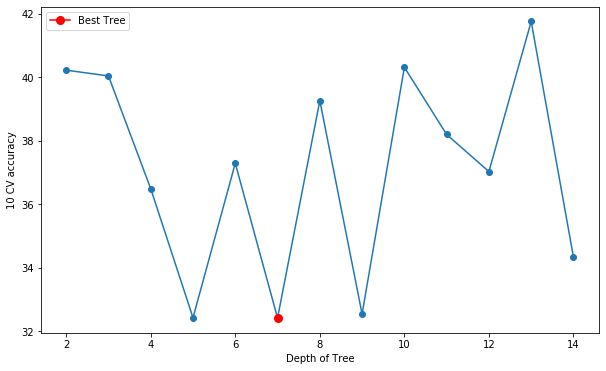

In [31]:
plt.figure(figsize = (10,6))
plt.plot(list(scores_dict.keys()),list(scores_dict.values()),marker ='o')
plt.plot(min(scores_dict, key=scores_dict.get),min(list(scores_dict.values())),marker = 'o',markersize = 8,color = 'r',label = 'Best Tree')
plt.xlabel('Depth of Tree')
plt.ylabel('10 CV accuracy')
plt.legend()

In [32]:
best_tree = DecisionTreeRegressor(max_depth=7)

# lets see its performance on unseen data 
best_tree.fit(X_train,y_train)
print('Training score ',best_tree.score(X_train,y_train))
print('Test scpre ',best_tree.score(X_test,y_test))

Training score  0.980549216271865
Test scpre  0.6666259185097169


We can see that we are getting lower test score for tree with max_depth = 7, than for a tree with max depth = 5. But remember, this is only for few data points. Cross val error is a better estimate of test error than validation set error. And tree with size 7 has lower cross validatoin error as compared to tree with size 5.

The best error is for the tree whose size is 7.

## Visualing the graph

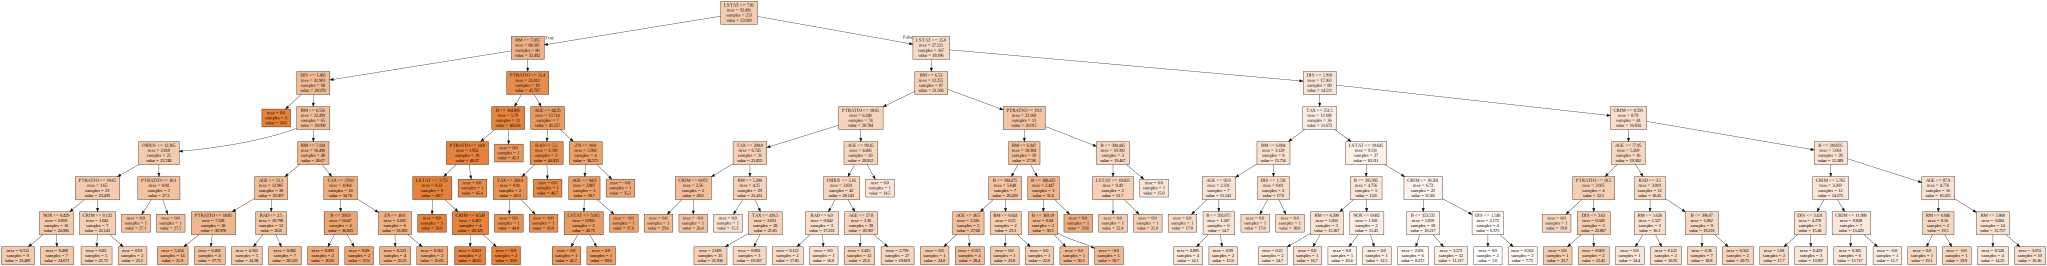

In [39]:
dot_data = tree.export_graphviz(best_tree, out_file=None, 
                                feature_names=X_train.columns,  
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph